In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Generative model LDA

In [27]:
train_A = np.genfromtxt('classificationA.train')
X_A = train_A[:, 0:2]
y_A = train_A[:, 2]

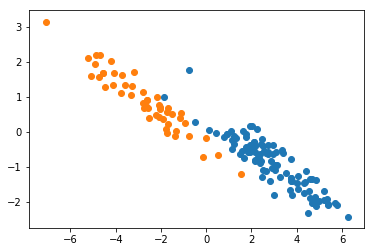

In [12]:
plt.scatter(X_A[y_A == 0, 0], X_A[y_A == 0, 1])
plt.scatter(X_A[y_A == 1, 0], X_A[y_A == 1, 1])
plt.show()

The data distribution $X|Y$ seems to follow a Gaussian distribution, from the plot $X|Y=0$ and $X|Y=1$ share approximate covariance matrices, which justifies using the Fisher assumption $\Sigma_0 = \Sigma_1 = \Sigma$

## MLE estimator

Let's estimate the parameters $\pi = p(Y=1)$, $(\mu_0, \mu_1, \Sigma)$ the respective means and the shared covariance matrix of the Gaussians.

In [36]:
n = X_A.shape[0] # Number of observations

sum_1 = np.sum(y_A) # Number of observations of class 1
sum_0 = n - sum_1   # Number of observations of class 0

pi = sum_1/n       # The estimated parameter pi
mu_1 = np.dot(X_A.T, y_A)/sum_1
mu_0 =np.dot(X_A.T, (1 - y_A))/sum_0
Sigma_sample_1 = np.dot((X_A - mu_1).T, y_A[:,np.newaxis]*(X_A - mu_1))/sum_1
Sigma_sample_0 = np.dot((X_A - mu_0).T, (1 - y_A)[:,np.newaxis]*(X_A - mu_1))/sum_0
Sigma = (sum_1*Sigma_sample_1 + sum_0*Sigma_sample_0)/n
Precision = np.linalg.inv(Sigma)

Now We can compute the parameters $a$ and $b$ of :
\begin{equation}
p(y=1|x) = \sigma(a + b^Tx)
\end{equation}

In [37]:
a = -(np.dot(mu_1.T, np.dot(Precision, mu_1)) - np.dot(mu_0.T, np.dot(Precision, mu_0)))/2 + np.log(pi/(1 - pi))
b = np.dot(Precision, mu_1 - mu_0)

Let's plot the line $p(Y = 1|x) = 0.5$ and see if it can separate the data to confirm the use of Fisher linear discriminant.

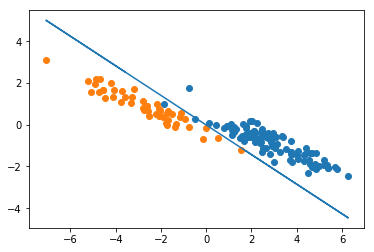

In [39]:
plt.scatter(X_A[y_A == 0, 0], X_A[y_A == 0, 1])
plt.scatter(X_A[y_A == 1, 0], X_A[y_A == 1, 1])
plt.plot(X_A[:, 0], -a/b[1] - (b[0]/b[1])*X_A[:, 0])
plt.show()

We can clearly see that the line separates well the two classes.